<center> <h1>House Price Prediction: Regularized Regression and Gradient Boosting</h1> </center> 

<br /> 
<center> <h3>Jie Tang, Ph.D.</h3> </center> 
<br /> 


![Alt text](https://kaggle2.blob.core.windows.net/competitions/kaggle/5407/media/housesbanner.png )





## Project Description

##### Kaggle Training Competition

Data set contains information from the Ames Assessor’s Office used in computing assessed values for Houses sold in Ames, Iowa from 2006 to 2010.

- Train.csv: 1460 observations, 81 variables
- Test.csv: 1459 observations, 80 variables (missing: 'SalePrice')
- Data_Description.txt

##### Evaluation

- Goal: Established model to predict the final price of each house in test dataset
- Metric: `Root-Mean-Squared-Error (RMSE)` between the logarithm of the predicted value and the logarithm of the observed sales price.


## ToolBox

##### Language
> Python 

##### Platform
> Jupyter Notebook

##### Package
 >  Numpy, Pandas, Scipy, 
 >  matplotlib, Seaborn, 
 >  Scikt-learn, XGboost

## Outline



__Data Exploration__
> 1. Filling Missing Values 
> 2. Removing Outliers
> 3. Dependent Variable Analysis  
    
    
__Feature Engineering__
> 1. Numerical variables
> 2. Categorical variables
> 3. Normalization
    
    
__Modeling__
> 1. Regularized regression models
> 2. Gradient Boosting
    
  
    
    



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.simplefilter("ignore")

# pd.options.display.max_columns = 
pd.options.display.max_rows = 1000
%matplotlib inline



/Users/jietang/anaconda3/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
pd.reset_option('all')

height has been deprecated.

line_width has been deprecated, use display.width instead (currently both are
identical)



In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Data Exploration

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [6]:
def cat_imputation(column,value,dataset):
    dataset.loc[dataset[column].isnull(),column] = value

In [7]:
#Checking for missing data
def check_missing():
    NAs = pd.concat([train.drop('SalePrice',axis=1).isnull().sum(), test.isnull().sum()], axis=1, keys=['Train', 'Test'])
    NAs.sort_values(by=['Train','Test'],inplace=True,ascending=False)
    NAs = NAs[NAs.sum(axis=1) > 0]
    return NAs

### Filling Missing Values

In [8]:
train[train['SalePrice'].isnull()].Id.count()

0

No missing value in Dependent variable: SalePrice

In [9]:
check_missing()

,Train,Test
PoolQC,1453,1456
MiscFeature,1406,1408
Alley,1369,1352
Fence,1179,1169
FireplaceQu,690,730
LotFrontage,259,227
GarageYrBlt,81,78
GarageFinish,81,78
GarageQual,81,78
GarageCond,81,78


In [10]:
def missing_plot(dataset):
    missing = dataset.isnull().sum()
    missing = missing[missing > 0]
    missing.sort_values(inplace=True)
#     print(missing)
    fig,ax = plt.subplots(figsize=(18,10))
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title('Missing Values',fontsize=20)
    missing.plot.bar()

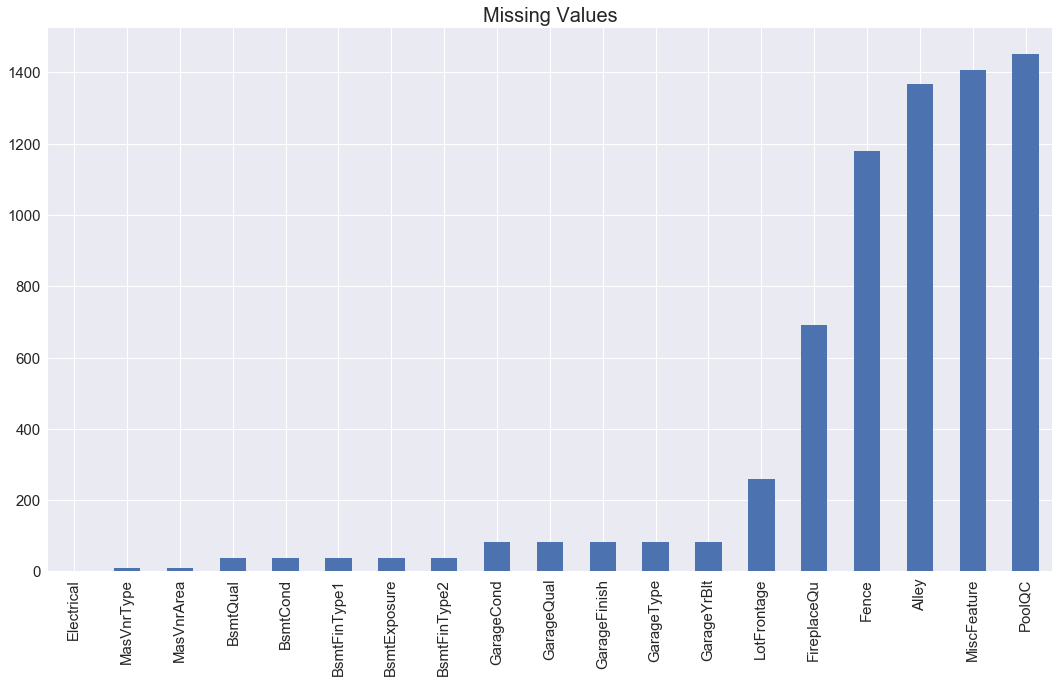

In [11]:
missing_plot(train)

### Filling Missing Values

##### Check `Garage`-prefix Variables

In [12]:
Garage_index = ['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','GarageCars','GarageArea']
train[Garage_index][train['GarageType'].isnull()].head(10)

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,GarageCars,GarageArea
39,NaN,NaN,NaN,NaN,NaN,0,0
48,NaN,NaN,NaN,NaN,NaN,0,0
78,NaN,NaN,NaN,NaN,NaN,0,0
88,NaN,NaN,NaN,NaN,NaN,0,0
89,NaN,NaN,NaN,NaN,NaN,0,0
99,NaN,NaN,NaN,NaN,NaN,0,0
108,NaN,NaN,NaN,NaN,NaN,0,0
125,NaN,NaN,NaN,NaN,NaN,0,0
127,NaN,NaN,NaN,NaN,NaN,0,0
140,NaN,NaN,NaN,NaN,NaN,0,0



##### variable_description.txt

GarageType: Garage location

             2Types	More than one type of garage
             Attchd	Attached to home
            Basment	Basement Garage
            BuiltIn	Built-In (Garage part of house - typically has room above garage)     
            CarPort	Car Port 
             Detchd	Detached from home
                 NA	No Garage



In [13]:
train['GarageType'].value_counts(dropna=False)

Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [14]:
# Garage Imputation
for s in [train,test]:
    for cols in Garage_index:
        if s[cols].dtype == np.object:
            cat_imputation(cols,'None',s)
        else:
            cat_imputation(cols,0,s)

In [15]:
train['GarageType'].value_counts(dropna=True)

Attchd     870
Detchd     387
BuiltIn     88
None        81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [16]:
cat_imputation('PoolQC','None',train)
cat_imputation('PoolQC','None',test)
cat_imputation('MiscFeature','None',train)
cat_imputation('MiscFeature','None',test)
cat_imputation('Fence','None',train)
cat_imputation('Fence','None',test)
cat_imputation('Alley','None',train)
cat_imputation('Alley','None',test)
cat_imputation('FireplaceQu','None',train)
cat_imputation('FireplaceQu','None',test)
cat_imputation('MasVnrType','None',train)
cat_imputation('MasVnrType','None',test)
cat_imputation('MasVnrArea',0,train)
cat_imputation('MasVnrArea',0,test)
cat_imputation('Electrical','SBrkr',train)
cat_imputation('Electrical','SBrkr',test)


In [17]:
missing_Bsmt = test.filter(like='Bsmt',axis=1).columns
for s in [train,test]:
    for e in missing_Bsmt:
        if s[e].dtype == np.object:
            cat_imputation(e,'None',s)
        else:
            cat_imputation(e,0,s)



In [18]:
missing_Bsmt

Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'BsmtFullBath', 'BsmtHalfBath'],
      dtype='object')

In [19]:
check_missing()

,Train,Test
LotFrontage,259,227
MSZoning,0,4
Utilities,0,2
Functional,0,2
Exterior1st,0,1
Exterior2nd,0,1
KitchenQual,0,1
SaleType,0,1



### Filling Missing Values

##### Check `Lot`-prefix Variables

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet


In [20]:
train['SqrtLotArea'] = np.sqrt(train['LotArea'])
print("Correlation of 'LotFrontage' with 'LotArea':",train['LotFrontage'].corr(train['LotArea']))
print("Correlation of 'LotFrontage' with 'SqrtLotArea':",train['LotFrontage'].corr(train['SqrtLotArea']))


Correlation of 'LotFrontage' with 'LotArea': 0.426095018772
Correlation of 'LotFrontage' with 'SqrtLotArea': 0.602002216794


In [21]:
tips = train[['LotFrontage','SqrtLotArea']].dropna()
# f, ax = plt.subplots(figsize=(15, 15))
# g = sns.regplot(data=tips,x='SqrtLotArea',y='LotFrontage',fit_reg=True);



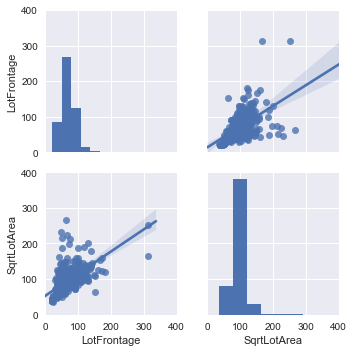

In [22]:
g = sns.pairplot(train[['LotFrontage','SqrtLotArea']].dropna(),kind = 'reg');
g.set(xlim=(0,400),ylim=(0,400));

Impute `LotFrontage` missing value by Regression Model with `SqrtLotArea`

In [23]:
cond = train['LotFrontage'].isnull()
train.LotFrontage[cond] = 0.625 * train.SqrtLotArea[cond]

In [24]:
del train['SqrtLotArea']

In [25]:
cond = test['LotFrontage'].isnull()
test.LotFrontage[cond] = np.sqrt(test.LotArea[cond])

In [26]:
check_missing()

,Train,Test
MSZoning,0,4
Utilities,0,2
Functional,0,2
Exterior1st,0,1
Exterior2nd,0,1
KitchenQual,0,1
SaleType,0,1


### Filling Missing Values

##### Check  Variable `Utilities`

In [27]:
train['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [28]:
test['Utilities'].value_counts()

AllPub    1457
Name: Utilities, dtype: int64

In [29]:
del train['Utilities']
del test['Utilities']

Drop feature 'Utilities'

### Filling Missing Values

In [30]:
check_missing()

,Train,Test
MSZoning,0,4
Functional,0,2
Exterior1st,0,1
Exterior2nd,0,1
KitchenQual,0,1
SaleType,0,1


In [31]:
test.loc[test['Exterior1st'].isnull(), 'Exterior1st'] = 'VinylSd'
test.loc[test['Exterior2nd'].isnull(), 'Exterior2nd'] = 'VinylSd'
cat_imputation('KitchenQual','TA',test)
cat_imputation('SaleType','WD',test)
cat_imputation('Functional','Typ',test)

In [32]:
cat_imputation('MSZoning','RL',test)

Impute missing value with most frequencies 

### Filling Missing Values

In [33]:
NAs = check_missing()
NAs.count()

Train    0
Test     0
dtype: int64

In [34]:
del train['Id']

del test['Id']


### Removing Outliers

In [35]:
sns.set(style='white')

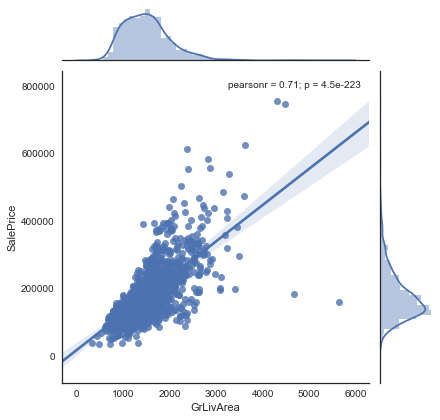

In [36]:
sns.jointplot(x=train['GrLivArea'],y=train['SalePrice'],kind='reg');

In [37]:
# Remove outliers manually (Two points in the bottom right)
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index).reset_index(drop=True)

### Removing Outliers

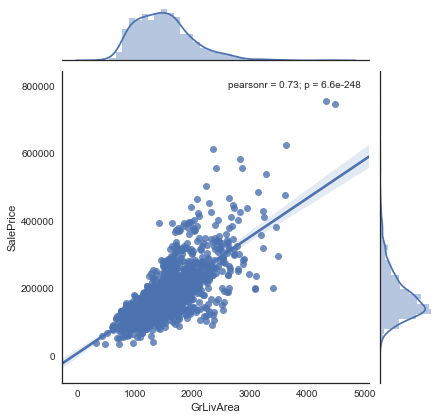

In [38]:
sns.jointplot(x=train['GrLivArea'],y=train['SalePrice'],kind='reg');

Robust to outliers is discussed in the Feature Engineering Procedure.

### Dependent Variable Transformation

In [39]:
def saleprice_plot():
    #Check the new distribution 
    sns.distplot(train['SalePrice'] , fit=stats.norm);

    # Get the fitted parameters used by the function
    (mu, sigma) = stats.norm.fit(train['SalePrice'])
    # print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

    #Now plot the distribution
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
                loc='best')
    plt.ylabel('Frequency')
    plt.title('SalePrice distribution')

    #Get also the QQ-plot
    fig = plt.figure()
    res = stats.probplot(train['SalePrice'], plot=plt)
    plt.show()

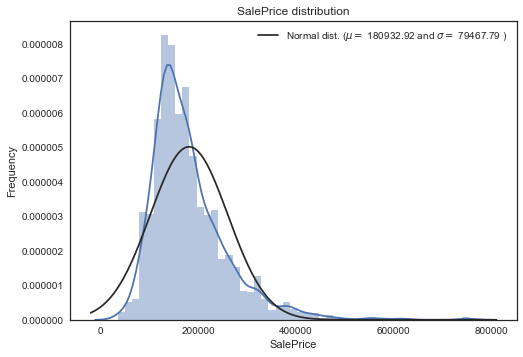

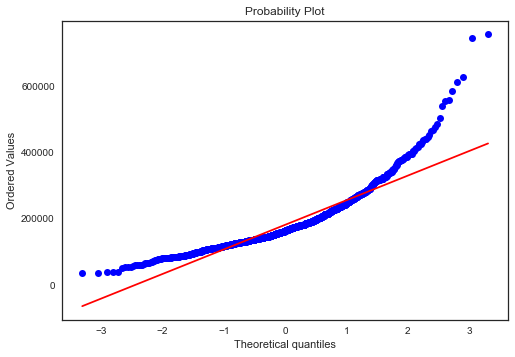

In [40]:
saleprice_plot()

### Dependent Variable Transformation

#### Use Log-Transform:
    y = log(y+1)

In [41]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

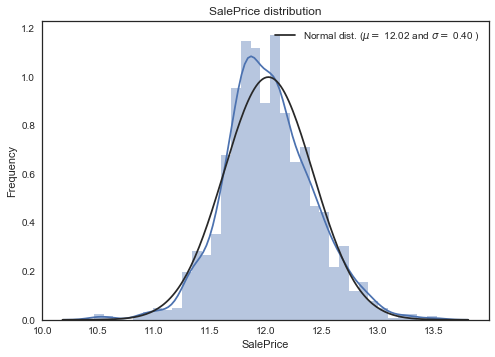

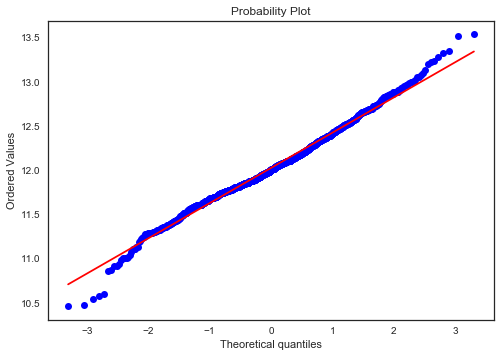

In [42]:
saleprice_plot()

In [43]:
## Join train and test datasets in order to avoid obtain the same number of feature during categorical conversion
train_len = len(train)
dataset =  pd.concat(objs=[train, test], axis=0).reset_index(drop=True)
dataset.drop('SalePrice',axis=1,inplace=True)

In [44]:
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
quantitative.remove('SalePrice')
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']


### Dependent Variable Analysis

#### Correlation Matrix with Quantitative Variables

In [45]:
corrmat = train[quantitative+['SalePrice']].corr()

mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)


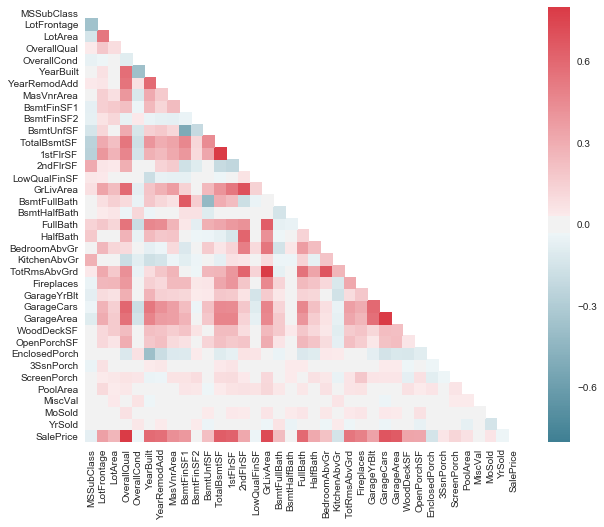

In [46]:
f,ax = plt.subplots(figsize=(10,8))
sns.heatmap(corrmat,mask=mask,cmap=cmap,vmax=0.8,square=True);

### Dependent Variable Analysis

#### Zoom-in Correlation Matrix

In [47]:

k = 10
cols = corrmat.nlargest(k,'SalePrice').index
cm = np.corrcoef(train[cols].values.T)

mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.set(font_scale=1.25)


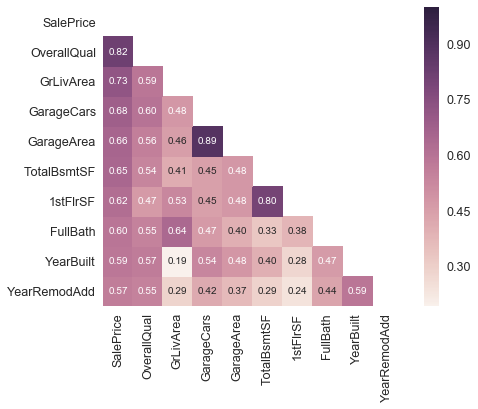

In [48]:
with sns.axes_style("white"):
    hm = sns.heatmap(cm,mask=mask,cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

### Dependent Variable Analysis

#### ANOVA test in Categorical Variables

In [49]:
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = qualitative
    pvals = []
    for c in qualitative:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(train)
a['disparity'] = np.log(1./a['pval'].values)
a = a[a['disparity'].notnull()]



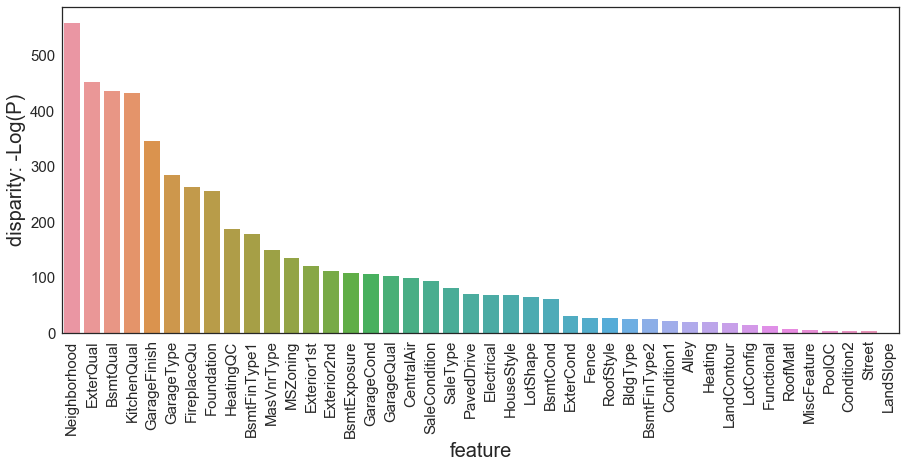

In [50]:
sns.set(style = 'white')
fig,ax = plt.subplots(figsize=(15,6))
b = sns.barplot(data=a, x='feature', y='disparity')
b.set_xlabel('feature',fontsize=20)
b.set_ylabel('disparity: -Log(P)',fontsize=20)
plt.yticks(fontsize=15)
x = plt.xticks(rotation=90,fontsize=15)

smaller p-values appear higher up

## Feature Engineering

### Numerical Variables

#### Transform discrete variables to categorical

Examples:

__OverallQual__: Rates the overall material and finish of the house

      10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

__MoSold__: Month Sold (MM)

__YrSold__: Year Sold (YYYY)




In [51]:
#MSSubClass=The building class
dataset['MSSubClass'] = dataset['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
dataset['OverallCond'] = dataset['OverallCond'].astype(str)
dataset['OverallQual'] = dataset['OverallQual'].astype(str)



#Year and month sold are transformed into categorical features.
dataset['YrSold'] = dataset['YrSold'].astype(str)
dataset['MoSold'] = dataset['MoSold'].astype(str)
dataset['GarageYrBlt'] = dataset['GarageYrBlt'].astype(str)


### Numerical Variables

#### Adding one more important feature

Since area related features are very important to determine house prices, we add one more feature which is the total area of basement, first and second floor areas of each house


In [52]:
# Adding total sqfootage feature 
dataset['TotalSF'] = dataset['TotalBsmtSF'] + dataset['1stFlrSF'] + dataset['2ndFlrSF']


### Numerical Variables

#### Reducing skewness (Log transformation)

In [53]:
numeric_feats = dataset.dtypes[dataset.dtypes != "object"].index
print(numeric_feats)
# Check the skew of all numerical features
skewed_feats = dataset[numeric_feats].apply(lambda x: stats.skew(x.dropna())).sort_values(ascending=False)
# print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})


Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea', 'LotFrontage',
       'LowQualFinSF', 'MasVnrArea', 'MiscVal', 'OpenPorchSF', 'PoolArea',
       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'TotalSF'],
      dtype='object')


In [54]:
skewness = skewness[abs(skewness) > 0.75].dropna()
skewness['sort'] = skewness.Skew.abs()
skewness = skewness.sort(columns='sort',ascending=False).drop('sort',axis=1)
skewness['Skew_Transformed'] = 0


In [55]:
from scipy.special import boxcox1p
lam = 0.15


for feat in skewness.index:
    dataset[feat] = np.log1p(dataset[feat])
#     dataset[feat] = boxcox1p(dataset[feat],lam)
    skewness.loc[feat,'Skew_Transformed'] = dataset[feat].skew()

In [56]:
skewness

,Skew,Skew_Transformed
MiscVal,21.939672,5.214687
PoolArea,17.688664,15.631314
LotArea,13.109495,-0.532920
LowQualFinSF,12.084539,8.559041
3SsnPorch,11.372080,8.826656
KitchenAbvGr,4.300550,3.520694
BsmtFinSF2,4.144503,2.462526
EnclosedPorch,4.002344,1.960960
ScreenPorch,3.945101,2.946085
BsmtHalfBath,3.929996,3.775149


In [57]:
# Feature engineering 
# Log transformations


# skewed_features = list(skewness.index)[:16]


In [58]:
# def multiplot(data,features,plottype,nrows,ncols,figsize,y=None,colorize=False):
#     """ This function draw a multi plot for 3 types of plots ["regplot","distplot","coutplot"]"""
#     n = 0
#     plt.figure(1)
#     fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    
#     if colorize:
#         colors = sns.color_palette(n_colors=(nrows*ncols))
#     else :
#         colors = [None]*(nrows*ncols)
        
#     for row in range(ncols):
#         for col in range(nrows):
            
#             if plottype == 'regplot':
#                 if y == None:
#                     raise ValueError('y value is needed with regplot type')
                
#                 sns.regplot(data = data, x = features[n], y = y ,ax=axes[row,col], color = colors[n])
#                 correlation = np.corrcoef(data[features[n]],data[y])[0,1]
#                 axes[row,col].set_title("Correlation {:.2f}".format(correlation))
            
#             elif plottype == 'distplot':
#                 sns.distplot(a = data[features[n]],ax = axes[row,col],color=colors[n])
#                 skewness = data[features[n]].skew()
#                 axes[row,col].legend(["Skew : {:.2f}".format(skewness)])
            
#             elif plottype in ['countplot']:
#                 g = sns.countplot(x = data[features[n]], y = y, ax = axes[row,col],color = colors[n])
#                 g = plt.setp(g.get_xticklabels(), rotation=45)
                
#             n += 1
#     plt.tight_layout()
#     plt.show()
#     plt.gcf().clear()

In [59]:
# multiplot(data = dataset,features = skewed_features,plottype = "distplot",
#           nrows = 4, ncols = 4, figsize = (11,9), colorize = True);

In [60]:
# for feature in skewed_features:
#     dataset[feature] = np.log1p(dataset[feature])

In [61]:
# multiplot(data = dataset,features = skewed_features,plottype = "distplot",
#           nrows = 4, ncols = 4, figsize = (11,9), colorize = True);


### Categorical Variables

#### Label Encoding for ordered categorical variables

Example -  FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

Sort: 0-NA, 1-Po, 2-Fa, 3-TA, 4-Gd, 5-Ex
  


In [62]:
# print('Data Type is {0}.'.format(dataset['FireplaceQu'].dtype))
FireplaceQu_example = pd.DataFrame()
FireplaceQu_example['Origin'] = dataset['FireplaceQu'].head(10)

In [63]:
dataset["BsmtCond"] = dataset["BsmtCond"].astype("category",categories=['None','Po','Fa','TA','Gd','Ex'],ordered=True).cat.codes
dataset["BsmtExposure"] = dataset["BsmtExposure"].astype("category",categories=['None','Mn','Av','Gd'],ordered=True).cat.codes
dataset["BsmtFinType1"] = dataset["BsmtFinType1"].astype("category",categories=['None','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],ordered=True).cat.codes
dataset["BsmtFinType2"] = dataset["BsmtFinType2"].astype("category",categories=['None','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],ordered=True).cat.codes
dataset["BsmtQual"] = dataset["BsmtQual"].astype("category",categories=['None','Po','Fa','TA','Gd','Ex'],ordered=True).cat.codes
dataset["ExterCond"] = dataset["ExterCond"].astype("category",categories=['Po','Fa','TA','Gd','Ex'],ordered=True).cat.codes
dataset["ExterQual"] = dataset["ExterQual"].astype("category",categories=['Po','Fa','TA','Gd','Ex'],ordered=True).cat.codes
dataset["Fence"] = dataset["Fence"].astype("category",categories=['None','MnWw','GdWo','MnPrv','GdPrv'],ordered=True).cat.codes
dataset["FireplaceQu"] = dataset["FireplaceQu"].astype("category",categories=['None','Po','Fa','TA','Gd','Ex'],ordered=True).cat.codes
dataset["Functional"] = dataset["Functional"].astype("category",categories=['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'],ordered=True).cat.codes
dataset["GarageCond"] = dataset["GarageCond"].astype("category",categories=['None','Po','Fa','TA','Gd','Ex'],ordered=True).cat.codes
dataset["GarageFinish"] = dataset["GarageFinish"].astype("category",categories=['None','Unf','RFn','Fin'],ordered=True).cat.codes
dataset["GarageQual"] = dataset["GarageQual"].astype("category",categories=['None','Po','Fa','TA','Gd','Ex'],ordered=True).cat.codes
dataset["HeatingQC"] = dataset["HeatingQC"].astype("category",categories=['Po','Fa','TA','Gd','Ex'],ordered=True).cat.codes
dataset["KitchenQual"] = dataset["KitchenQual"].astype("category",categories=['Po','Fa','TA','Gd','Ex'],ordered=True).cat.codes
dataset["PavedDrive"] = dataset["PavedDrive"].astype("category",categories=['N','P','Y'],ordered=True).cat.codes
dataset["PoolQC"] = dataset["PoolQC"].astype("category",categories=['None','Fa','TA','Gd','Ex'],ordered=True).cat.codes


In [64]:
# Back
#Changing OverallCond into a categorical variable
dataset['OverallCond'] = dataset['OverallCond'].astype(int)
dataset['OverallQual'] = dataset['OverallQual'].astype(int)



In [65]:
FireplaceQu_example['Encoded'] = dataset['FireplaceQu'].head(10)

In [66]:
FireplaceQu_example.head(5)

,Origin,Encoded
0,None,0
1,TA,3
2,TA,3
3,Gd,4
4,TA,3


### Categorical Values

#### Transform non-ordered categorical varibles into dummmies variables.

Example:

MasVnrType: Masonry veneer type

       BrkFace	 Brick Face
        CBlock	 Cinder Block
          None	 None
         Stone	 Stone


In [67]:
MasVnrType_example = pd.DataFrame()
MasVnrType_example['MasVnrType'] = dataset['MasVnrType']

In [68]:
# non ordered
dataset = pd.get_dummies(dataset,columns=["Alley","BldgType","CentralAir",
"Condition1","Condition2","Electrical","Exterior1st","Exterior2nd","Foundation",
"GarageType","Heating","HouseStyle","LandContour","LandSlope","LotConfig","LotShape",
"MSZoning","MasVnrType","MiscFeature","Neighborhood","RoofMatl","RoofStyle",
"SaleCondition","SaleType","Street","MSSubClass",'MoSold','YrSold','GarageYrBlt'],drop_first=True)

In [69]:
dataset[dataset.filter(like='MSSubClass',axis=1).columns].head()

,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [70]:
dataset = dataset.drop(labels=['MSSubClass_150','Condition2_PosN',
                               'MSSubClass_160'],axis = 1)

In [71]:
MasVnrType_columns =  dataset.filter(like='MasVnrType_',axis=1).columns

MasVnrType_example[MasVnrType_columns] = dataset[MasVnrType_columns]

In [72]:
MasVnrType_example.head(5)

,MasVnrType,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,BrkFace,1,0,0
1,None,0,1,0
2,BrkFace,1,0,0
3,None,0,1,0
4,BrkFace,1,0,0


### Normalization

Features with different scales, we need to normalize the data.

Use `RobustScaler()` normalizer in `sklearn` to make my models robust to outliers.

`RobustScaler()`:

Scale features using statistics that are robust to outliers.

This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

Typically this is done by removing the mean and scaling to unit variance. However, outliers can often influence the sample mean / variance in a negative way. In such cases, the median and the interquartile range often give better results.

In [73]:
from sklearn.preprocessing import RobustScaler
N =RobustScaler()
dataset_test = N.fit_transform(dataset)

# test = N.transform(dataset)
dataset_test = pd.DataFrame(dataset_test,columns=dataset.columns)

### Data Prepared for Modeling


In [74]:
dataset_test.head(10)

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,...,GarageYrBlt_2002.0,GarageYrBlt_2003.0,GarageYrBlt_2004.0,GarageYrBlt_2005.0,GarageYrBlt_2006.0,GarageYrBlt_2007.0,GarageYrBlt_2008.0,GarageYrBlt_2009.0,GarageYrBlt_2010.0,GarageYrBlt_2207.0
0,-0.512207,1.029414,0.000000,0.0,0.0,0.0,0.098543,0.000000,0.4,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.336482,0.000000,0.000000,0.0,0.0,2.0,0.147872,0.000000,0.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.354592,1.031539,0.000000,0.0,0.0,1.0,0.042050,0.000000,0.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.259276,1.010851,0.000000,0.0,1.0,0.0,-0.080457,0.000000,0.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.123740,1.061320,0.000000,1.0,0.0,1.5,0.087196,0.000000,0.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-0.671051,0.966784,5.771441,-2.0,0.0,0.0,0.104016,0.000000,0.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.980303,0.000000,0.000000,0.0,0.0,1.5,0.198798,0.000000,0.4,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.049944,1.050841,0.000000,0.0,0.0,1.0,0.128231,3.496508,0.2,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,-0.124731,1.010044,0.000000,-1.0,0.0,0.0,-0.895778,0.000000,-0.6,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,-0.010127,0.000000,0.000000,-1.0,0.0,0.0,0.126815,0.000000,0.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
X_train = dataset_test[:train_len]
test = dataset_test[train_len:]
Y_train = train['SalePrice']
Y_train = Y_train.reshape((X_train.shape[0],1))


In [76]:
Y_train.shape

(1458, 1)

## Modeling

In [77]:
from sklearn.linear_model import RidgeCV,LassoCV, Ridge, LassoLarsCV,ElasticNetCV
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
import xgboost as xgb

/Users/jietang/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [78]:
#Validation function

def RMSE(estimator,X_train, Y_train, cv=5,n_jobs=4):
    cv_results = cross_val_score(estimator,X_train,Y_train,cv=cv,scoring="neg_mean_squared_error",n_jobs=n_jobs)
    return (np.sqrt(-cv_results)).mean()
def RMSE2(estimator,X_train, Y_train, cv=6,n_jobs=4):
    cv_results = cross_val_score(estimator,X_train,Y_train,cv=cv,scoring="neg_mean_squared_error",n_jobs=n_jobs)
    return (np.sqrt(-cv_results)).mean()



### Regularized Regression Models 

__Ridge__: Linear least squares with L2 regularization.

__Lasso__: Linear Model trained with L1 regularization.

__LassoLars__: Lasso model fit with Least Angle Regression a.k.a. Lars.

__ElasticNet__: Linear regression with combined L1 and L2 priors as regularizer.



Use __5-Fold Cross Validation__ to assess the building models.

#### Ridge Regression

Use __Learning Curve__ to find the best Regulization Strength alpha.


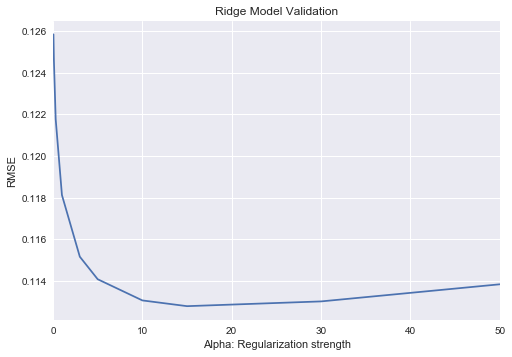

In [79]:
alphas = [0.05,0.1,0.3,1,3,5,10,15,30,50]
cv_ridge = [RMSE2(Ridge(alpha=a),X_train,Y_train) for a in alphas]
sns.set()
cv_ridge = pd.Series(cv_ridge, index=alphas)
cv_ridge.plot(title='Ridge Model Validation')
plt.xlabel('Alpha: Regularization strength')
plt.ylabel('RMSE');

In [80]:
lassocv = LassoCV(eps=1e-7) 
ridge = Ridge(alpha=1e-6)
lassolarscv = LassoLarsCV()
elasticnetcv = ElasticNetCV(eps=1e-15)



In [81]:
m2 = RMSE(lassocv, X_train, Y_train)

In [82]:
m1 = RMSE(ridge, X_train, Y_train)

In [83]:
m3 = RMSE(lassolarscv, X_train, Y_train)

In [84]:
m4 = RMSE(elasticnetcv, X_train, Y_train)

In [85]:
ridge.fit(X_train,Y_train)

Ridge(alpha=1e-06, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

### Lasso Model

Use Gradient Descent to do Feature Reduction and Coefficients Calculation.

`LassoCV(alphas=None, copy_X=True, cv=None, eps=1e-07, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)`


In [86]:
lassocv.fit(X_train,Y_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=1e-07, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

### LassoLars Model

Use Least Angle Algorithm(Advanced Forward Selection) to do Feature Selection and Coefficients Calculation.

`LassoLarsCV(copy_X=True, cv=None, eps=2.2204460492503131e-16,
      fit_intercept=True, max_iter=500, max_n_alphas=1000, n_jobs=1,
      normalize=True, positive=False, precompute='auto', verbose=False)`


In [87]:
lassolarscv.fit(X_train,Y_train)

LassoLarsCV(copy_X=True, cv=None, eps=2.2204460492503131e-16,
      fit_intercept=True, max_iter=500, max_n_alphas=1000, n_jobs=1,
      normalize=True, positive=False, precompute='auto', verbose=False)

Start with all coefficients bj equal to zero.
Find the predictor xj most correlated with y
Increase the coefficient bj in the direction of the sign of its correlation with y. Take residuals r=y-yhat along the way. Stop when some other predictor xk has as much correlation with r as xj has.
Increase (bj, bk) in their joint least squares direction, until some other predictor xm has as much correlation with the residual r.
Continue until: all predictors are in the model

### ElasticNet Model

Use Gradient Descent to do Feature Selection and Coefficients Calculation.

`ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=1e-15, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)`


In [88]:
elasticnetcv.fit(X_train,Y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=1e-15, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [89]:
features =  X_train.columns 
ridge_coef = ridge.coef_!=0

#### Cross Validation Score in 4 models

In [90]:
print("       Ridge regression has conserved {0} features over {1}.\nThe mean of RMSE is {2}.\n".format(len(features[ridge_coef[0]]),X_train.shape[1],m1))
print("     LassoCV regression has conserved {0} features over {1}.\nThe mean of RMSE is {2}.\n".format(len(features[lassocv.coef_!=0]),X_train.shape[1],m2))
print(" LassoLarsCV regression has conserved  {0} features over {1}.\nThe mean of RMSE is {2}.\n".format(len(features[lassolarscv.coef_!=0]) ,X_train.shape[1],m3))
print("ElasticNetCV regression has conserved {0} features over {1}.\nThe mean of RMSE is {2}.\n".format(len(features[elasticnetcv.coef_!=0]),X_train.shape[1],m4))

       Ridge regression has conserved 324 features over 330.
The mean of RMSE is 0.12998510883635078.

     LassoCV regression has conserved 119 features over 330.
The mean of RMSE is 0.11396837037553671.

 LassoLarsCV regression has conserved  88 features over 330.
The mean of RMSE is 0.1153366382752675.

ElasticNetCV regression has conserved 112 features over 330.
The mean of RMSE is 0.1140381275861077.



In [91]:
Y_pred_ridge = np.expm1(ridge.predict(test))
Y_pred_lassocv = np.expm1(lassocv.predict(test))
Y_pred_lassolarscv = np.expm1(lassolarscv.predict(test))
Y_pred_elasticnetcv = np.expm1(elasticnetcv.predict(test))



In [92]:
results = pd.read_csv("sample_submission.csv")
results["SalePrice"] = Y_pred_lassocv*0.4 + Y_pred_elasticnetcv*0.2 + Y_pred_lassolarscv*0.2 + Y_pred_ridge*0.2
results.to_csv("results_1.csv",index=False)


results["SalePrice"] = (Y_pred_lassocv*0.4 + Y_pred_elasticnetcv*0.3 + Y_pred_lassolarscv*0.3)*1 

results.to_csv("results_2.csv",index=False)



## Score  

#### Combined Linear Models

`pred` = `LassoCV`\*0.4 + `LassoLarsCV`\*0.2 + `ElasticNetCV`\*0.2+`Ridge`\*0.2

Score:  0.40832    __Bad!__




`pred` = `LassoCV`\*0.4 + `LassoLarsCV`\*0.3 + `ElasticNetCV`\*0.3

Score: 0.12122    __Looks OK.__

### Gradient Boosting

Ensemble Method

Key idea: Training weak learners to be a strong learner.

Get Gradient Boosting Model by training a lot of regression trees using XGboost.

Boosting combines a set of weak learners and delivers improved prediction accuracy. At any instant t, the model outcomes are weighed based on the outcomes of previous instant t-1. The outcomes predicted correctly are given a lower weight and the ones miss-classified are weighted higher. 

In [93]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

Use Cross Validation to tune the hyper-parameters.

In [94]:
m5 = RMSE(GBoost,X_train,Y_train)
m5

0.11704518814395881

In [95]:
GBoost.fit(X_train,Y_train)
Y_pred_GBoost = np.expm1(GBoost.predict(test))

In [96]:
print("GBoost Model has conserved {0} features over {1}.\nThe mean of RMSE is {2}.".format(len(GBoost.feature_importances_),X_train.shape[1],m5))

GBoost Model has conserved 330 features over 330.
The mean of RMSE is 0.11704518814395881.


In [97]:
def feature_importance(name, regressor):
    sns.set(style='white')
    fig, axes = plt.subplots(figsize=(10,10))

    if name == "GBoosting":
        imp = regressor.feature_importances_
        sort_list = np.argsort(imp)[::-1]
        indices = sort_list[:40]

    else:
        imp = regressor.coef_
        sort_list = np.argsort(imp)[::-1]
        indices = np.append(sort_list[:30],sort_list[-10:])


    g = sns.barplot(y=features[indices],x = imp[indices] , orient='h')
    g.set_xlabel("Relative importance",fontsize=18)
    g.set_ylabel("Features",fontsize=18)
    g.tick_params(labelsize=15)
    g.set_title(name + " feature importance",fontsize=20)
    
    plt.tight_layout()
    plt.show()
    plt.gcf().clear()

In [98]:
sort_list = np.argsort(lassocv.coef_)[::-1]
# indices = np.append(sort_list[:40],sort_list[-20:])
indices = sort_list[:40]
indices

array([ 27,  39, 195, 155, 171,  47, 188, 164, 152,  77, 326, 165, 139,
        38,  58,  45,  56, 327,   6,  32,  49,  21, 179, 141,  28,  29,
        10, 105,  42,  23,  20,  19, 170, 132, 292,  31,  48,  46,   5, 111])

### Feature Importance Plot

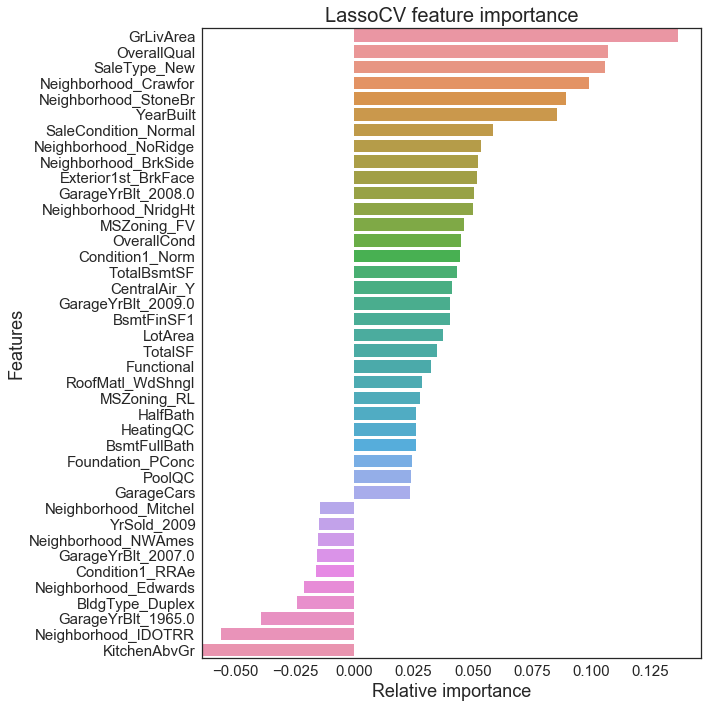

In [99]:
feature_importance('LassoCV',lassocv);

### Feature Importance Plot

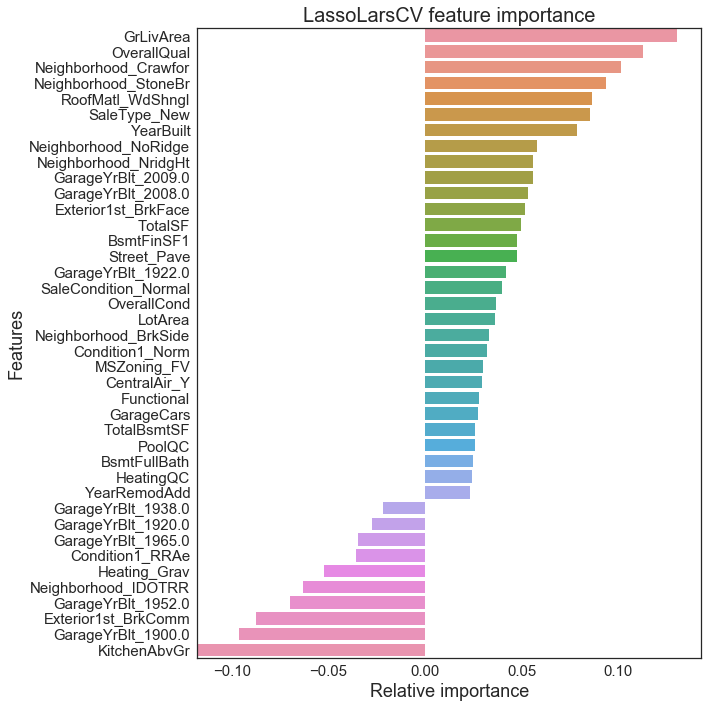

In [100]:
feature_importance('LassoLarsCV',lassolarscv);

### Feature Importance Plot

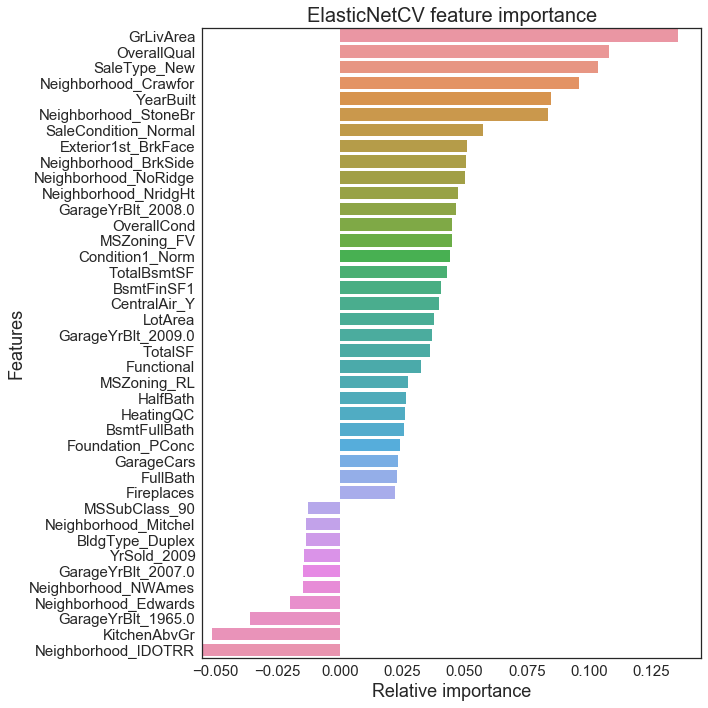

In [101]:
feature_importance('ElasticNetCV',elasticnetcv)

### Feature Importance Plot

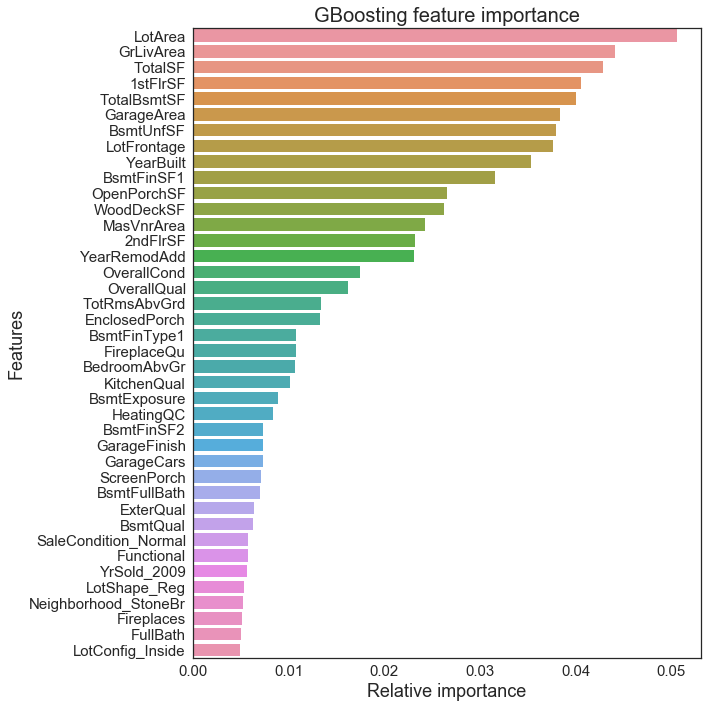

In [102]:
feature_importance('GBoosting',GBoost)

In [103]:
results["SalePrice"] =   Y_pred_GBoost 

results.to_csv("results_3.csv",index=False)



results["SalePrice"] = ((Y_pred_lassocv*0.4 + Y_pred_elasticnetcv*0.3 + Y_pred_lassolarscv*0.3))*0.5 +  Y_pred_GBoost*0.5 

results.to_csv("results_4.csv",index=False)



### Final Score  

#### Combined Linear Models and Gradient Boosting Model

`pred` = (`LassoCV`\*0.4 + `LassoLarsCV`\*0.3 + `ElasticNetCV`\*0.3)\*0.5+`Gboost`\*0.5

Score: 0.11798 

__Top 15% In Kaggle__

Rank 10 Score: 0.11140



### Future Improvement


  -  Advanced Imputation for `LotFrontage`.


  -  Strong Feature engineering  (such as PCA).


  -  Try more models and ensemble methods.





# Thanks for Listening!

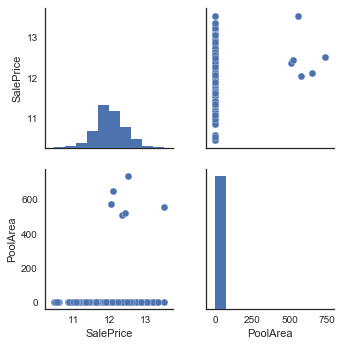

In [104]:
sns.pairplot(train,vars=['SalePrice','PoolArea'])